# Gaussian Process Regression




Created by Nilay Kumar (nkumar4@nd.edu)

The following examples, codes, and text were adapted from these references:
1. https://www.youtube.com/channel/UCcAtD_VYwcYwVbTdvArsm7w
2. Dr. Juan Camilo Orduz, An Introduction to Gaussian Process Regression, https://juanitorduz.github.io/gaussian_process_reg/
3. Hilarie Sit, Quick Start to Gaussian Process Regression, https://towardsdatascience.com/quick-start-to-gaussian-process-regression-36d838810319

In [1]:
import pandas as pd
import numpy as np
from pandas import ExcelWriter
from pandas import ExcelFile
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

%matplotlib inline

import os, requests, urllib

# GitHub pages url
url = "https://ndcbe.github.io/cbe67701-uncertainty-quantification/"

# relative file paths to download
# this is the only line of code you need to change
file_paths = ['figures/GPR-1.PNG','figures/GPR-2.PNG','figures/GPR-3.PNG','figures/GPR-4.PNG']

# loop over all files to download
for file_path in file_paths:
    print("Checking for",file_path)
    # split each file_path into a folder and filename
    stem, filename = os.path.split(file_path)
    
    # check if the folder name is not empty
    if stem:
        # check if the folder exists
        if not os.path.exists(stem):
            print("\tCreating folder",stem)
            # if the folder does not exist, create it
            os.mkdir(stem)
    # if the file does not exist, create it by downloading from GitHub pages
    if not os.path.isfile(file_path):
        file_url = urllib.parse.urljoin(url,
                urllib.request.pathname2url(file_path))
        print("\tDownloading",file_url)
        with open(file_path, 'wb') as f:
            f.write(requests.get(file_url).content)
    else:
        print("\tFile found!")

Checking for figures/GPR-1.PNG
	File found!
Checking for figures/GPR-2.PNG
	File found!
Checking for figures/GPR-3.PNG
	File found!
Checking for figures/GPR-4.PNG
	File found!


## Background

![alt text](./figures/GPR-1.png)

![alt text](./figures/GPR-1.png)

![alt text](./figures/GPR-3.png)

![alt text](./figures/GPR-4.png)

## Setup

Create synthetic data

In [2]:
num = 200

# Defining data points for training using a mathematical function
x = np.linspace(start=0, stop=1, num=num)
def f(x):
    f = np.sin((4*np.pi)*x) + np.sin((7*np.pi)*x)
    return(f)
f_x = f(x)

# Adding noise to data points for generating training data for gpr
sigma_noise = 0.4
epsilon = np.random.normal(loc=0, scale=sigma_noise, size=num)
y = f_x + epsilon


Creating input and response variables from the data, plotting the variables

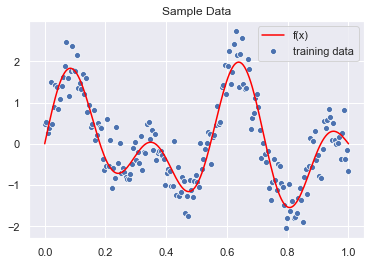

In [3]:
fig, ax = plt.subplots()
# Plot data points with added noise
sns.scatterplot(x=x, y=y, label='training data', ax=ax);
# Plot function.
sns.lineplot(x=x, y=f_x, color='red', label='f(x)', ax=ax);

ax.set(title='Sample Data')
ax.legend(loc='upper right');

Creating a function that fits a gp model to the data

In [4]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel, RBF

# Setting up dimension of the problem
d = 1;
n = 200; 
X = x.reshape(n, d)
y = y

# Function fits a gp model to a dataset (inputs are parameters of the model)
def gpPrediction( l, sigma_f, sigma_n ):
    # Kernel definition 
    kernel = ConstantKernel(constant_value=sigma_f, constant_value_bounds=(1e-2, 1e2)) \
              * RBF(length_scale=l, length_scale_bounds=(1e-2, 1e2))
    # GP model 
    gp = GaussianProcessRegressor(kernel=kernel, alpha=sigma_n**2, n_restarts_optimizer=10, )
    gp.fit(X, y)
    # Make the prediction on test set.
    y_pred = gp.predict(X)
    return y_pred

## Parametric study 1: Role of $l$ in model fitting

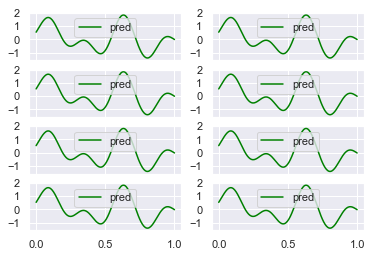

In [5]:
varx = x;
vary = y;

fig, ax = plt.subplots()
error = np.zeros(8)
for i in range(1, 9):
    plt.subplot(4,2,i)
    y_pred = gpPrediction(i,3,1)
    error[i-1] = np.linalg.norm(y-y_pred)
    # Plot training data.
    sns.scatterplot(x=varx, y=vary, label='training data', ax=ax); 
    # Plot prediction. 
    sns.lineplot(x=varx, y=y_pred, color='green', label='pred')
    ax.set(title='Prediction & Credible Interval')
    ax.legend(loc='lower left');

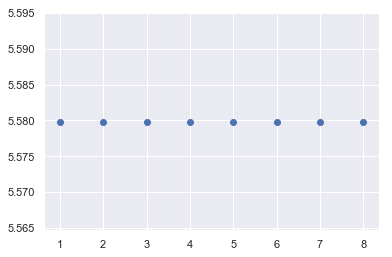

In [6]:
plt.scatter(range(1,9), error);
plt.show()

## Parametric study 2: Role of $\sigma_f$ in model fitting


$\sigma_f$ codes for the amplitude of the kernel function used.

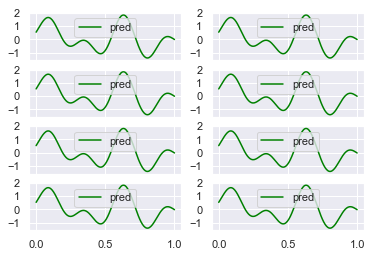

In [7]:
for i in range(1, 9):
    plt.subplot(4,2,i)
    y_pred = gpPrediction(1,i,1)
    # error[i-1] = np.linalg.norm(y-y_pred)
    # Plot training data.
    sns.scatterplot(x=varx, y=vary, label='training data', ax=ax); 
    # Plot prediction. 
    sns.lineplot(x=varx, y=y_pred, color='green', label='pred')
    ax.set(title='Prediction & Credible Interval')
    ax.legend(loc='lower left');

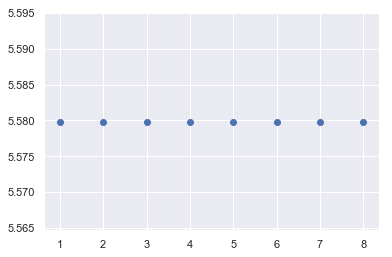

In [8]:
plt.scatter(range(1,9), error);
plt.show()

## Parametric study 3: Role of $\sigma_n$ in model fitting.

$\sigma_n$ allows user to put a bias for amount of noise in the data.

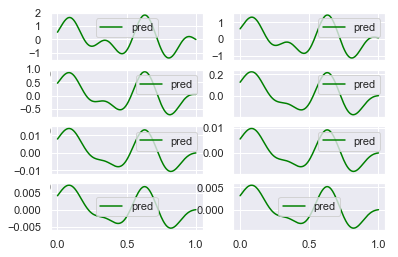

In [9]:
for i in range(1, 9):
    plt.subplot(4,2,i)
    y_pred = gpPrediction(1,0.1,i)
    # error[i-1] = np.linalg.norm(y-y_pred)
    # Plot training data.
    sns.scatterplot(x=varx, y=vary, label='training data', ax=ax); 
    # Plot prediction. 
    sns.lineplot(x=varx, y=y_pred, color='green', label='pred')
    ax.set(title='Prediction & Credible Interval')
    ax.legend(loc='lower left');

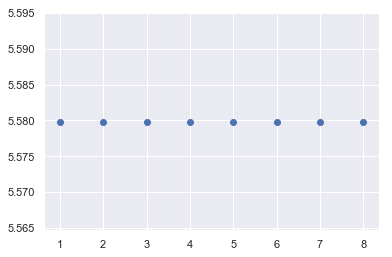

In [10]:
plt.scatter(range(1,9), error);
plt.show()